In [305]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
#sns.set_theme(style="ticks", color_codes=True)


In [306]:
# loading the dataset

train = pd.read_csv("train_dataset.csv")
test = pd.read_csv("test_dataset.csv")

# making duplicate copies of the data

train_df = train.copy()
test_df = test.copy()



In [307]:
# How many features do we have?

cols = train.columns.to_list()
print("The number of features we have here is:",len(cols))

The number of features we have here is: 20


In [308]:
# Shape of the both train and test data we have

print("The shape of train data:",train.shape)
print("The shape of test data:", test.shape)

The shape of train data: (6800, 20)
The shape of test data: (3200, 19)


In [309]:
# First view of the data

train.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,22880,F,NaN,N,NaN,N,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0
2,7254,297,D,NaN,27957,F,N,N,NaN,N,0.3,328.0,2.64,4.0,NaN,NaN,116.0,194.0,10.3,3.0
3,3135,1872,C,D-penicillamine,21111,F,NaN,Y,Y,N,0.3,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5,4.0
4,2483,939,CL,D-penicillamine,18061,F,NaN,NaN,NaN,N,0.5,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4,2.0


1) **ID:** Unique Identifier

2) **N_Days:** number of days between registration and the earlier of death, transplantation, or study analysis time.

3) **Status:** status of the patient C (censored), CL (censored due to liver tx), or D (death)

4) **Drug:** type of the drug. D-penicillamine or placebo

5) **Age:** age in [days]

6) **Sex:** M (male) or F (female)

7) **Ascites:** presence of ascites N (No) or Y (Yes). Abdominal swelling caused by accumulation of fluid, most often related to liver disease.

8) **Hepatomegaly:** The presence of hepatomegaly N (No) or Y (Yes). An enlarged liver.

9) **Spiders:** The presence of spiders N (No) or Y (Yes). Spider nevus commonly occurs when you have a lot of estrogen in your system, as is the case with chronic liver disease or during pregnancy. Spider nevus is more common in people with alcohol-related liver cirrhosis (liver disease) than in those with cirrhosis not related to alcohol.

10) **Edema:** the presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy). Edema is swelling caused by excess fluid trapped in your body's tissues

11) **Bilirubin:** serum bilirubin in [mg/dl]. Bilirubin (bil-ih-ROO-bin) is a yellowish pigment that is made during the normal breakdown of red blood cells. Bilirubin passes through the liver and is eventually excreted out of the body. Higher than normal levels of bilirubin may indicate different types of liver or bile duct problems

12) **Cholesterol:** serum cholesterol in [mg/dl]

13) **Albumin:** albumin in [gm/dl] Albumin is a protein made by your liver. Albumin helps keep fluid in your bloodstream so it doesn't leak into other tissues. It is also carries various substances throughout your body, including hormones, vitamins, and enzymes. Low albumin levels can indicate a problem with your liver or kidneys.

14) **Copper:** urine copper in [ug/day]

15) **Alk_Phos:** alkaline phosphatase in [U/liter]

16) **SGOT:** SGOT in [U/ml].  Serum glutamic oxaloacetic transaminase, an enzyme that is normally present in liver and heart cells. SGOT is released into blood when the liver or heart is damaged

17) **Triglycerides:** triglicerides in [mg/dl]

18) **Platelets:** platelets per cubic [ml/1000]

19) **Prothrombin:** prothrombin time in seconds [s]

20) **Stage:** histologic stage of disease (1, 2, 3, or 4)

In [310]:
# What are the features we have?

print("The features we have are:\n\n",train.columns.to_list())

The features we have are:

 ['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


- Stage is our target or dependent variable which we need to predict

In [311]:
# Numerical columns

def cols_dtype(df):
    numerical_cols = df.select_dtypes(include = (["int64","float64"])).columns.to_list()
    cat_cols = df.select_dtypes(include = (("object"))).columns.to_list()
    print("Numerical Columns:\n",numerical_cols)
    print("\n Categorical Columns:\n",cat_cols)

cols_dtype(train)


Numerical Columns:
 ['ID', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

 Categorical Columns:
 ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


In [312]:
# Missing Values

round(train.isna().sum()*100/train.shape[0],2)

ID                0.00
N_Days            0.00
Status            0.00
Drug             29.78
Age               0.00
Sex               0.00
Ascites          33.03
Hepatomegaly     35.69
Spiders          38.09
Edema             0.00
Bilirubin         0.00
Cholesterol      45.60
Albumin           0.00
Copper           31.71
Alk_Phos         36.74
SGOT             30.91
Tryglicerides    41.35
Platelets         4.97
Prothrombin       2.28
Stage             0.00
dtype: float64

- We have missing values for both numerical columns and categorical columns as well

In [313]:
# Smummary statistics

train.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,6800.000000,6800.000000,6800.000000,6800.000000,3699.000000,6800.000000,4644.000000,4302.000000,4698.000000,3988.000000,6462.000000,6645.000000,6800.000000
mean,6268.608088,1664.055441,22863.223529,1.806147,294.575831,3.036118,68.569121,1802.951464,79.554427,133.857823,293.306097,11.231031,3.157206
std,2405.527133,1332.308135,4671.135682,3.218009,128.085317,0.528164,59.637733,1618.550339,43.433832,47.291444,115.146088,1.123444,0.993059
min,1239.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,4353.750000,537.000000,19416.500000,0.300000,204.000000,2.680000,26.000000,1122.650000,35.290000,114.000000,213.000000,10.500000,2.000000
50%,6599.500000,1443.000000,23367.000000,0.400000,312.000000,3.020000,68.000000,1563.150000,88.505000,128.000000,285.000000,11.100000,4.000000
75%,8299.250000,2519.000000,27125.500000,1.800000,353.000000,3.390000,91.000000,2013.250000,110.672500,141.000000,365.000000,11.700000,4.000000
max,9999.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,340.480000,498.000000,563.000000,18.000000,4.000000


### Missing Value Imputation:
- It wont be wise for dropping the rows which have missing values, because it would lose lot of information, so we will try to impute it
- For categorical variables we will impute it with the mst frequent values ie the mode for the column
- For numeircal variables, we can impute it with mean or median. Here since the data from summary statistics shows that ts skewed enough, we would use median.

In [314]:
def num_imputation(df):

    num_cols = df.select_dtypes(include = ("int64", "float64")).columns.to_list()
    for i in num_cols:
        df[i].fillna(df[i].median(), inplace = True)


num_imputation(train)
train.select_dtypes(include = ("int64","float64")).isna().sum()
    

ID               0
N_Days           0
Age              0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [315]:
# categorical imputation

def cat_imputation(df):
    cat_cols = df.select_dtypes(include = ("object")).columns.to_list()
    for i in cat_cols:
        df[i].fillna(df[i].mode().values[0], inplace = True)

cat_imputation(train)
train.isna().sum()


ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

### **Exploratory Data Analysis**

In [316]:
# lets explore stage since its our target variable
train_df["Stage"].value_counts()

4.0    3506
2.0    1507
3.0    1322
1.0     465
Name: Stage, dtype: int64

Text(0.5, 0.98, 'Number of patients per stages')

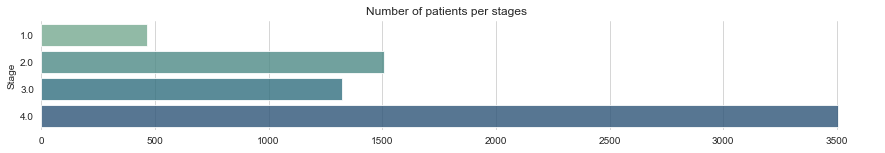

In [317]:
plt.figure(figsize = (15,2))
sns.countplot(y = train["Stage"],palette = "crest", alpha = 0.8)
sns.despine(top = True, right = True, bottom = True, left = True)
plt.tick_params(axis = "both", which = "both", bottom = False, top = False, left = False)
plt.xlabel("")
plt.suptitle("Number of patients per stages")

- Number of patients in each stage seems to be imbalanced especially in stage 1 and stage 4. It would create problems in preparing our model. So we have to do account for this imbalanced dataset

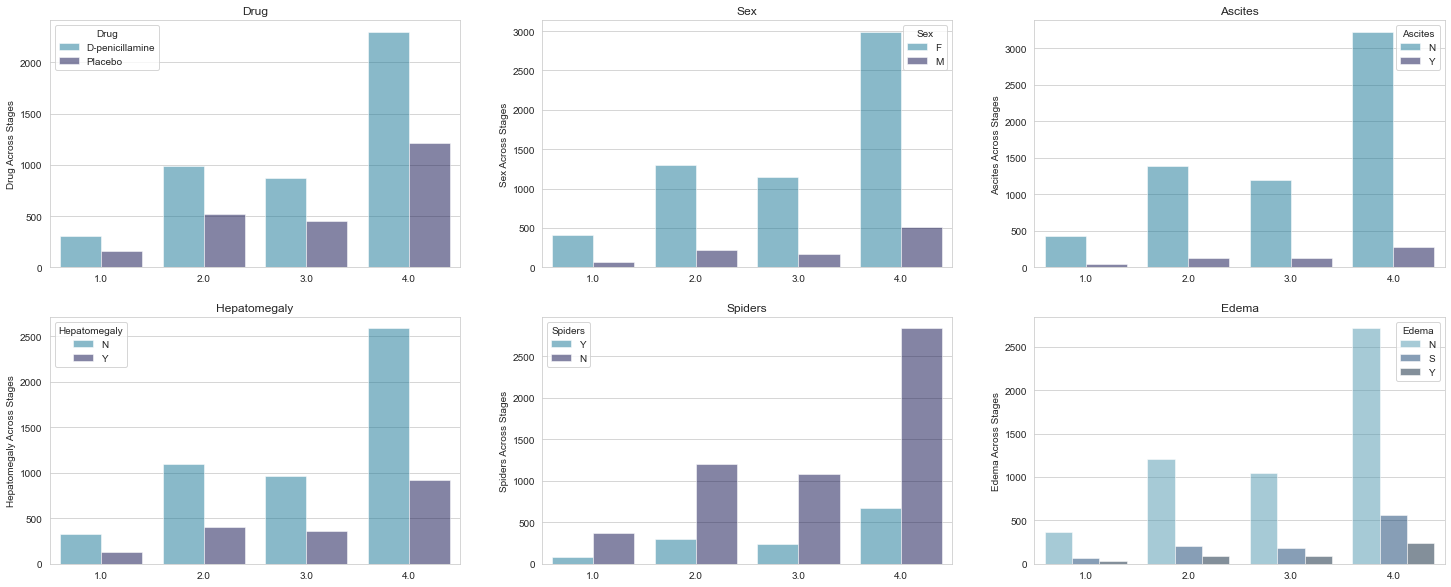

In [318]:
# Time to see the relationship of our features with the target variable. Lets see the categorical features first
def categorical_dist(cols, train):

    plt.figure(figsize = (25,10))
    n = 1
    for i in range(len(cols)):
        a = int(str(23) + str(n))
        plt.subplot(a)
        sns.countplot(x = train["Stage"], hue = train[cols[i]], palette = "ocean_r", alpha = 0.5)
        plt.tick_params(axis = "both", which = "both", bottom = False, top = False, left = False)
        plt.xlabel("")
        plt.ylabel(cols[i] +  " Across Stages")
        plt.title(cols[i])
        n+=1

cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
categorical_dist(cols, train)

In [319]:
# For seeing the distribution with numerical features lets make stage 1,2 and 3 as 0 stage(no or mild cirhosis) and stage 4 as 1(cirhosis)

train["Stage"] = np.where(train["Stage"] == 4, 1,0)

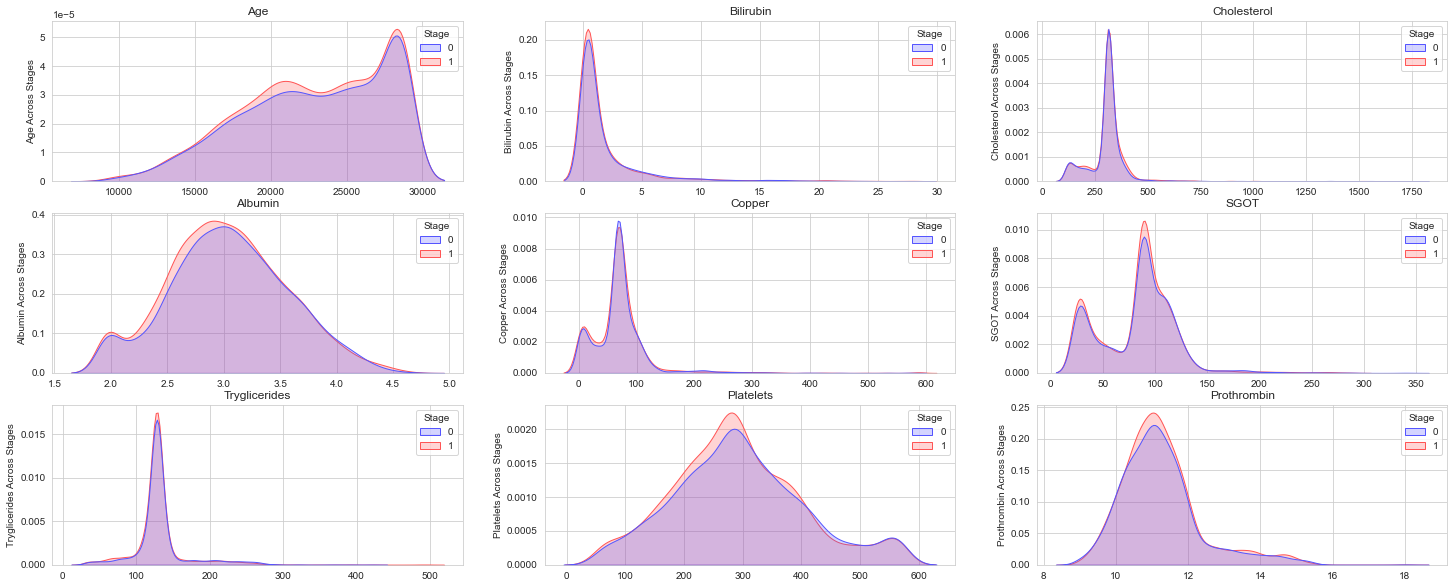

In [320]:
# Time to see the relationship of our numerical features with the target variable.
def numerical_dist(cols, train):

    plt.figure(figsize = (25,10))
    n = 1
    for i in range(len(cols)):
        a = int(str(33) + str(n))
        plt.subplot(a)
        sns.kdeplot(train[cols[i]], hue = train["Stage"], fill=True , palette="seismic")        
        plt.tick_params(axis = "both", which = "both", bottom = False, top = False, left = False)
        plt.xlabel("")
        plt.ylabel(cols[i] +  " Across Stages")
        plt.title(cols[i])
        n+=1

cols =  ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper','SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
numerical_dist(cols, train)

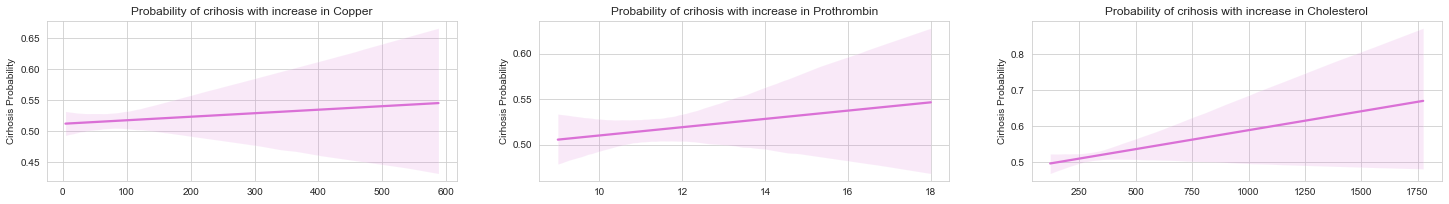

In [321]:
# Lets deep dive and see the reg plot for them to see if there is any underlying correlation among the features and their stages
def correlation_features1(cols, train):

    plt.figure(figsize = (25,10))
    n = 1
    for i in range(len(cols)):
        a = int(str(33) + str(n))
        plt.subplot(a)
        sns.regplot(x = train[cols[i]], y = train["Stage"], scatter = False, color = "orchid")        
        plt.tick_params(axis = "both", which = "both", bottom = False, top = False, left = False)
        plt.xlabel("")
        plt.ylabel("Cirhosis Probability")
        plt.title("Probability of crihosis with increase in " + cols[i])
        n+=1

cols =  ['Copper', 'Prothrombin', 'Cholesterol']
correlation_features1(cols, train)

- The data we have shows that with increase in Copper, Prothrombin and Choleterol, the chances of having liver cirhosis increases

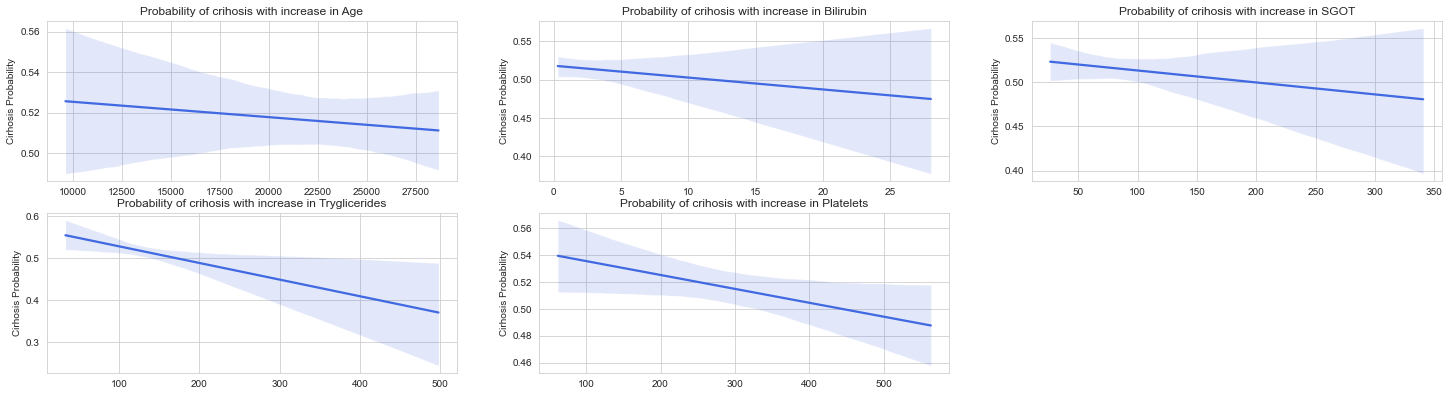

In [322]:
# Lets deep dive and see the reg plot for them to see if there is any underlying correlation among the features and their stages
def correlation_features2(cols, train):

    plt.figure(figsize = (25,10))
    n = 1
    for i in range(len(cols)):
        a = int(str(33) + str(n))
        plt.subplot(a)
        sns.regplot(x = train[cols[i]], y = train["Stage"], scatter = False, color = "royalblue")        
        plt.tick_params(axis = "both", which = "both", bottom = False, top = False, left = False)
        plt.xlabel("")
        plt.ylabel("Cirhosis Probability")
        plt.title("Probability of crihosis with increase in " + cols[i])
        n+=1

cols =  ['Age','Bilirubin', 'SGOT', "Tryglicerides", "Platelets"]
correlation_features2(cols, train)

- Wiith increase in platelet counts the probability of having cirhosis decreases bacuse liver cirhosis often lowers the platelet count to a great level.
- Probability of desease is also found to decrease with increase in tryglicerides, bilirubin, and SGOT
- In case of age, scientist estimates that cirhosis affects about 1 in 200 adults age 45 to 54, the age group most commonly affected by cirrhosis. Our plot shows too that with increase in age the probability of having cirhosis decreases

### **Feature Engineering**

- We will encode the categorical variables:
  - Drug: D-penicillamine = 0, Placebo = 1
  - Sex: M = 0, F = 1
  - Ascites: N = 0, Y=1
  - Hepatomegaly: N = 0, Y = 1
  - Spiders: N = 0, Y = 1
  - Edema: N = 0, Y = 1

In [323]:
def feature_eng(train):
    train["Drug"] = np.where(train["Drug"]=="D-penicillamine", 0, 1)
    train["Sex"] = np.where(train["Sex"]=="M", 0, 1)
    train["Ascites"] = np.where(train["Ascites"] == "N", 0, 1)
    train["Hepatomegaly"] = np.where(train["Hepatomegaly"] == "N", 0, 1)
    train["Spiders"] = np.where(train["Spiders"] == "N", 0, 1)
    train["Edema"] = np.where(train["Edema"] == "N", 0, 1)

feature_eng(train)
train.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,0,19581,1,0,0,1,0,0.3,279.0,2.96,84.0,1500.80,99.430,109.0,293.0,10.2,1
1,7326,41,C,0,22880,1,0,0,0,0,0.3,312.0,2.96,68.0,1835.40,26.350,131.0,308.0,10.8,0
2,7254,297,D,0,27957,1,0,0,0,0,0.3,328.0,2.64,4.0,1563.15,88.505,116.0,194.0,10.3,0
3,3135,1872,C,0,21111,1,0,1,1,0,0.3,302.0,2.02,49.0,1563.15,26.350,128.0,285.0,10.5,1
4,2483,939,CL,0,18061,1,0,0,0,0,0.5,344.0,3.11,91.0,1563.15,104.560,128.0,306.0,11.4,0


In [324]:
# Separating features and target variables

X = train.drop(['Status', 'N_Days', 'Stage'], axis=1)
Y = train["Stage"]

### Model Building

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 27, stratify=np.array(Y))
log_model = LogisticRegression()
model = log_model.fit(X_train, y_train)
predictions = log_model.predict(X_test)


In [326]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.59      0.63      0.61       988
           1       0.63      0.59      0.61      1052

    accuracy                           0.61      2040
   macro avg       0.61      0.61      0.61      2040
weighted avg       0.61      0.61      0.61      2040

